In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import os 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("D:\SLIIT\Third Semester\ML\Projects\DataSet\Hear failour")

In [3]:
heart_failure_df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [4]:
y = heart_failure_df['DEATH_EVENT']
X = heart_failure_df.drop(['DEATH_EVENT'], axis = 1)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

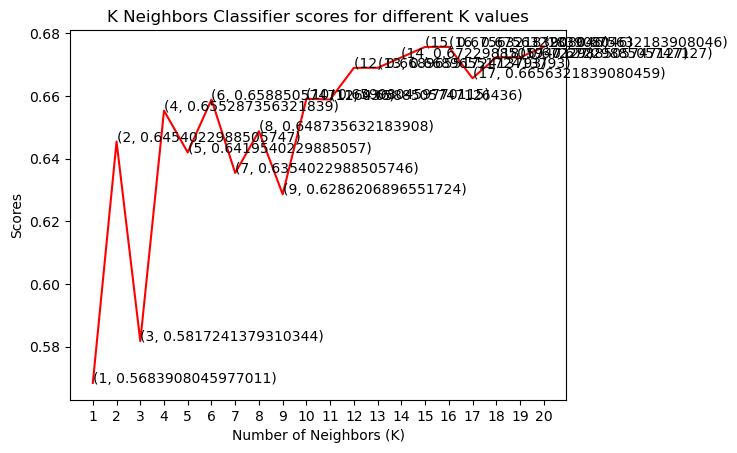

In [6]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [7]:
knn_classifier = KNeighborsClassifier(n_neighbors = 15)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.675632183908046

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.20)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 15)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=15)

In [11]:
Y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.85        45
           1       0.50      0.07      0.12        15

    accuracy                           0.75        60
   macro avg       0.63      0.52      0.49        60
weighted avg       0.69      0.75      0.67        60

[[44  1]
 [14  1]]
